In [88]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)# to show all columns in output
pd.set_option('display.max_rows', None)# to show all rows
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [89]:
data_test=('../nawalhasan/Desktop/all/test.csv')
data_train =('../nawalhasan/Desktop/all/train.csv')
 

In [90]:
train = pd.read_csv(data_train) 
train.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [91]:
test=pd.read_csv(data_test)
test.head()


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [92]:
print(train.shape)
print(test.shape)

(2051, 82)
(879, 80)


In [93]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [94]:
rename_train  = train.columns
rename_test =  test.columns
train.columns = [name.replace(' ', '_') if ' ' in name else name for name in rename_train  ]
test.columns = [name.replace(' ', '_') if ' ' in name else name for name in rename_test ]
 

In [95]:
for a in range(len(rename_train)):
    try:
        train[rename_train].astype('float64')
    except:
        continue 

for a in range(len(rename_test)):
    try:
        test_data[rename_test].astype('float64')
    except:
        continue 

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS_SubClass        879 non-null int64
MS_Zoning          879 non-null object
Lot_Frontage       719 non-null float64
Lot_Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot_Shape          879 non-null object
Land_Contour       879 non-null object
Utilities          879 non-null object
Lot_Config         879 non-null object
Land_Slope         879 non-null object
Neighborhood       879 non-null object
Condition_1        879 non-null object
Condition_2        879 non-null object
Bldg_Type          879 non-null object
House_Style        879 non-null object
Overall_Qual       879 non-null int64
Overall_Cond       879 non-null int64
Year_Built         879 non-null int64
Year_Remod/Add     879 non-null int64
Roof_Style         879 non-null object
Roof_M

In [112]:
outside_house=train.loc[:, ['MS_SubClass','MS_Zoning','Lot_Frontage','Street','Alley',
              'Lot_Shape', 'Land_Contour',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2','SalePrice']]

In [113]:
outside_house.info()
outside_house.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 13 columns):
MS_SubClass     2051 non-null int64
MS_Zoning       2051 non-null object
Lot_Frontage    1721 non-null float64
Street          2051 non-null object
Alley           140 non-null object
Lot_Shape       2051 non-null object
Land_Contour    2051 non-null object
Lot_Config      2051 non-null object
Land_Slope      2051 non-null object
Neighborhood    2051 non-null object
Condition_1     2051 non-null object
Condition_2     2051 non-null object
SalePrice       2051 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 208.4+ KB


,MS_SubClass,MS_Zoning,Lot_Frontage,Street,Alley,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,SalePrice
0,60,RL,NaN,Pave,NaN,IR1,Lvl,CulDSac,Gtl,Sawyer,RRAe,Norm,130500
1,60,RL,43.0,Pave,NaN,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,220000


In [149]:
outside_house = train.corr()
outside_house

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,-0.045878,0.000723,0.008555,-0.038346,-0.022650,-0.008388,0.011719,-0.023881,-0.033385,0.014381,-0.059086,-0.042054,0.010605,-0.002400,-0.009092,-0.037560,-0.050730,-0.048666,-0.045201,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,-0.086522,-0.013144,-0.111281,-0.203795,-0.145862,-0.005598,0.072268,-0.112936,-0.030554,-0.001946,-0.179370,-0.163975,0.009122,0.068416,-0.084999,-0.120710,-0.251257,-0.228368,-0.200891,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS_SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,-0.060854,-0.068265,-0.139911,-0.226038,-0.246212,0.305771,0.031091,0.068210,0.025055,-0.017249,0.142087,0.179404,-0.003516,0.252111,0.034490,-0.055118,0.084954,-0.049148,-0.108228,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot_Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,0.214178,0.036740,0.127605,0.356584,0.463900,0.013700,-0.000300,0.383856,0.111441,-0.030858,0.152812,0.035842,0.220414,0.015856,0.362704,0.253456,0.067865,0.297143,0.358457,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot_Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.215430,0.041717,0.041184,0.277175,0.381593,0.029398,0.001273,0.327427,0.116128,0.029980,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall_Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.278742,-0.028199,0.275773,0.548742,0.477136,0.228152,-0.052338,0.566701,0.175171,-0.047318,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall_Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.045768,0.047810,-0.130521,-0.158643,-0.150938,0.010912,0.004753,-0.109804,-0.039113,0.100324,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year_Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.275440,-0.021031,0.136662,0.410254,0.323315,0.022313,-0.159403,0.258838,0.215200,-0.031464,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year_Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.166680,-0.057163,0.160066,0.308545,0.244190,0.159605,-0.066577,0.322407,0.153507,-0.037923,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas_Vnr_Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.321807,-0.016756,0.085853,0.4085

In [148]:
# plt.subplots(figsize=(12,9))
# sns.heatmap(outside_house, vmax=0.9, square=True)

/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


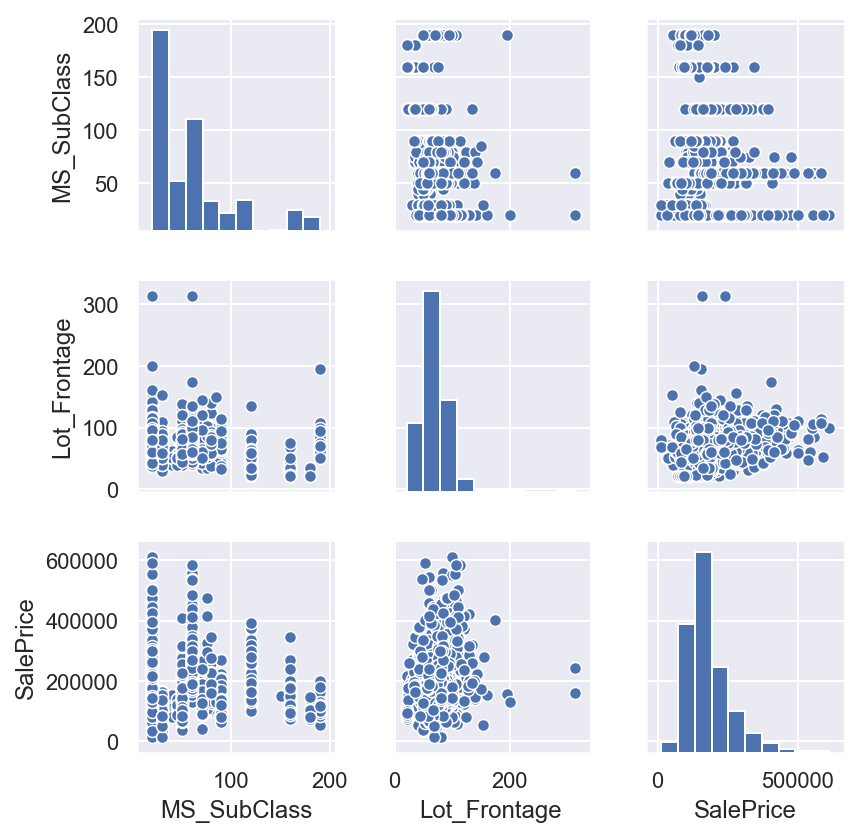

In [118]:
sns.set()
sns.pairplot(outside_house,size = 2 ,kind ='scatter')
plt.show()

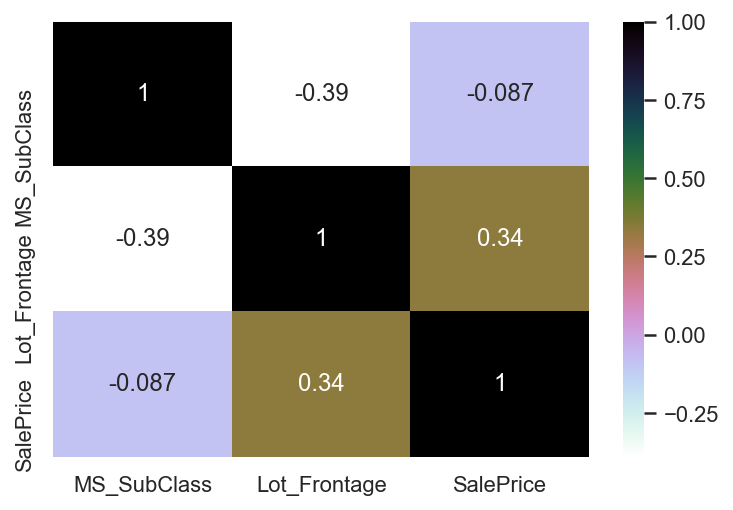

In [120]:
sns.heatmap(outside_house.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [122]:
inside_house=train.loc[:, ['SalePrice','Bldg_Type','House_Style','Year_Built', 'Year_Remod/Add','Garage_Yr_Blt']]


In [123]:
inside_house.info()
inside_house.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 6 columns):
SalePrice         2051 non-null int64
Bldg_Type         2051 non-null object
House_Style       2051 non-null object
Year_Built        2051 non-null int64
Year_Remod/Add    2051 non-null int64
Garage_Yr_Blt     1937 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 96.2+ KB


,SalePrice,Bldg_Type,House_Style,Year_Built,Year_Remod/Add,Garage_Yr_Blt
0,130500,1Fam,2Story,1976,2005,1976.0
1,220000,1Fam,2Story,1996,1997,1997.0
2,109000,1Fam,1Story,1953,2007,1953.0
3,174000,1Fam,2Story,2006,2007,2007.0
4,138500,1Fam,1.5Fin,1900,1993,1957.0


In [124]:
more_side_house=train.loc[:, ['Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Foundation', 'Functional', 'Garage_Type', 'Garage_Finish', 'Garage_Cars',
         'Garage_Finish','Paved_Drive','Misc_Feature', 'Misc_Val','SalePrice' ]]

In [109]:
more_side_house.info()
more_side_house.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 14 columns):
Roof_Style       2051 non-null object
Roof_Matl        2051 non-null object
Exterior_1st     2051 non-null object
Exterior_2nd     2051 non-null object
Mas_Vnr_Type     2029 non-null object
Foundation       2051 non-null object
Functional       2051 non-null object
Garage_Type      1938 non-null object
Garage_Finish    1937 non-null object
Garage_Cars      2050 non-null float64
Garage_Finish    1937 non-null object
Paved_Drive      2051 non-null object
Misc_Feature     65 non-null object
Misc_Val         2051 non-null int64
dtypes: float64(1), int64(1), object(12)
memory usage: 224.4+ KB


,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Foundation,Functional,Garage_Type,Garage_Finish,Garage_Cars,Garage_Finish,Paved_Drive,Misc_Feature,Misc_Val
0,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,Typ,Attchd,RFn,2.0,RFn,Y,NaN,0
1,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,Typ,Attchd,RFn,2.0,RFn,Y,NaN,0


In [125]:
system_house=train.loc[:, ['Heating','saleprice'
       'Central_Air',, 'Electrical' ,'SalePrice']]

/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [126]:
system_house.info()
system_house.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 6 columns):
Heating                 2051 non-null object
salepriceCentral_Air    0 non-null float64
1st_Flr_SF              2051 non-null int64
2nd_Flr_SF              2051 non-null int64
Electrical              2051 non-null object
SalePrice               2051 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 96.2+ KB


,Heating,salepriceCentral_Air,1st_Flr_SF,2nd_Flr_SF,Electrical,SalePrice
0,GasA,NaN,725,754,SBrkr,130500
1,GasA,NaN,913,1209,SBrkr,220000


In [142]:
area_inside_house=train.loc[:, ['Low_Qual_Fin_SF','Gr_Liv_Area'
       'Garage_Cars', '1st_Flr_SF',
       '2nd_Flr_SF', 'Wood_Deck_SF' ,'SalePrice','Open_Porch_SF','Enclosed_Porch', '3Ssn_Porch',
                                'Screen_Porch', 'Pool_Area', 'Lot_Area', 'Mas_Vnr_Area','SalePrice']]

In [143]:
area_inside_house.info()
area_inside_house.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 14 columns):
Low_Qual_Fin_SF           2051 non-null int64
Gr_Liv_AreaGarage_Cars    0 non-null float64
1st_Flr_SF                2051 non-null int64
2nd_Flr_SF                2051 non-null int64
Wood_Deck_SF              2051 non-null int64
SalePrice                 2051 non-null int64
Open_Porch_SF             2051 non-null int64
Enclosed_Porch            2051 non-null int64
3Ssn_Porch                2051 non-null int64
Screen_Porch              2051 non-null int64
Pool_Area                 2051 non-null int64
Lot_Area                  2051 non-null int64
Mas_Vnr_Area              2029 non-null float64
SalePrice                 2051 non-null int64
dtypes: float64(2), int64(12)
memory usage: 224.4 KB


,Low_Qual_Fin_SF,Gr_Liv_AreaGarage_Cars,1st_Flr_SF,2nd_Flr_SF,Wood_Deck_SF,SalePrice,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Lot_Area,Mas_Vnr_Area,SalePrice
0,0,NaN,725,754,0,130500,44,0,0,0,0,13517,289.0,130500
1,0,NaN,913,1209,0,220000,74,0,0,0,0,11492,132.0,220000


In [140]:
count_house=train.loc[:, ['Bsmt_Full_Bath','Bsmt_Half_Bath', 'Full_Bath',
                            'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'TotRms_AbvGrd','Fireplace_Qu','SalePrice']]

In [141]:
count_house.info()
count_house.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 9 columns):
Bsmt_Full_Bath    2049 non-null float64
Bsmt_Half_Bath    2049 non-null float64
Full_Bath         2051 non-null int64
Half_Bath         2051 non-null int64
Bedroom_AbvGr     2051 non-null int64
Kitchen_AbvGr     2051 non-null int64
TotRms_AbvGrd     2051 non-null int64
Fireplace_Qu      1051 non-null object
SalePrice         2051 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 144.3+ KB


,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplace_Qu,SalePrice
0,0.0,0.0,2,1,3,1,6,NaN,130500
1,1.0,0.0,2,1,4,1,8,TA,220000


In [138]:
rate_house=train.loc[:, ['Kitchen_Qual','Fireplace_Qu', 'Garage_Qual',
                            'Pool_QC', 'Fence',
       'Overall_Cond', 'Overall_Qual','Exter_Qual',
                         'Bsmt_Qual','BsmtFin_Type_1','BsmtFin_Type_2','Heating_QC','SalePrice']]

In [139]:
rate_house.info()
rate_house.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 13 columns):
Kitchen_Qual      2051 non-null object
Fireplace_Qu      1051 non-null object
Garage_Qual       1937 non-null object
Pool_QC           9 non-null object
Fence             400 non-null object
Overall_Cond      2051 non-null int64
Overall_Qual      2051 non-null int64
Exter_Qual        2051 non-null object
Bsmt_Qual         1996 non-null object
BsmtFin_Type_1    1996 non-null object
BsmtFin_Type_2    1995 non-null object
Heating_QC        2051 non-null object
SalePrice         2051 non-null int64
dtypes: int64(3), object(10)
memory usage: 208.4+ KB


,Kitchen_Qual,Fireplace_Qu,Garage_Qual,Pool_QC,Fence,Overall_Cond,Overall_Qual,Exter_Qual,Bsmt_Qual,BsmtFin_Type_1,BsmtFin_Type_2,Heating_QC,SalePrice
0,Gd,NaN,TA,NaN,NaN,8,6,Gd,TA,GLQ,Unf,Ex,130500
1,Gd,TA,TA,NaN,NaN,5,7,Gd,Gd,GLQ,Unf,Ex,220000


In [150]:
after_sale_house=train.loc[:, ['Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type',
       'Sale_Condition', 'Misc_Val','Garage_Cars','SalePrice']]

In [151]:
after_sale_house.info()
after_sale_house.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
Misc_Val          2051 non-null int64
Mo_Sold           2051 non-null int64
Yr_Sold           2051 non-null int64
Sale_Type         2051 non-null object
Sale_Condition    2051 non-null object
Misc_Val          2051 non-null int64
Garage_Cars       2050 non-null float64
SalePrice         2051 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 128.3+ KB


,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,Misc_Val,Garage_Cars,SalePrice
0,0,3,2010,WD,Normal,0,2.0,130500
1,0,4,2009,WD,Normal,0,2.0,220000


In [130]:
train.columns

Index(['Id', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
       'G

In [12]:
train.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [13]:
test.dtypes.value_counts()

object     42
int64      27
float64    11
dtype: int64

In [14]:
null_train = train.isnull().sum() 
null_train

Id                    0
PID                   0
MS_SubClass           0
MS_Zoning             0
Lot_Frontage        330
Lot_Area              0
Street                0
Alley              1911
Lot_Shape             0
Land_Contour          0
Utilities             0
Lot_Config            0
Land_Slope            0
Neighborhood          0
Condition_1           0
Condition_2           0
Bldg_Type             0
House_Style           0
Overall_Qual          0
Overall_Cond          0
Year_Built            0
Year_Remod/Add        0
Roof_Style            0
Roof_Matl             0
Exterior_1st          0
Exterior_2nd          0
Mas_Vnr_Type         22
Mas_Vnr_Area         22
Exter_Qual            0
Exter_Cond            0
Foundation            0
Bsmt_Qual            55
Bsmt_Cond            55
Bsmt_Exposure        58
BsmtFin_Type_1       55
BsmtFin_SF_1          1
BsmtFin_Type_2       56
BsmtFin_SF_2          1
Bsmt_Unf_SF           1
Total_Bsmt_SF         1
Heating               0
Heating_QC      

In [17]:
print(train.columns)

Index(['Id', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Yr_Blt',
       'G

In [17]:
train['Pool_QC'].fillna('NaN', inplace=True) 
train['Misc_Feature'].fillna('NaN', inplace=True) 
train['Alley'].fillna('NaN', inplace=True) 
train['Fence'].fillna('NaN', inplace=True) 
train['Fireplaces'].fillna('NaN', inplace=True) 
train['Garage_Cond'].fillna('NaN', inplace=True) 
train['Garage_Qual'].fillna('NaN', inplace=True) 

In [18]:
# null_test = test.isnull().sum().value_counts()
# null_test

In [19]:
#fill unll
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [20]:
print(train.isnull().sum().value_counts())
print(test.isnull().sum().value_counts())

0    82
dtype: int64
0    80
dtype: int64


In [41]:
train.describe()


,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
count,2039.000000,2.039000e+03,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,1475.581167,7.146841e+08,57.108877,57.807749,9994.694949,6.093183,5.565473,1971.511525,1984.062776,95.535066,437.847965,47.270231,566.022560,1051.140755,1159.155468,327.427170,5.545365,1492.128004,0.424718,0.063757,1.572339,0.368318,2.841589,1.043158,6.414909,0.587052,1867.922021,1.768514,470.871015,93.154487,47.330064,22.704757,2.606670,16.067190,2.411967,51.877881,6.224620,2007.775380,179274.140265
std,843.016310,1.887050e+08,42.902724,33.139864,6614.872965,1.408006,1.106899,30.154716,21.029980,169.243211,455.148925,162.344075,443.347641,442.224664,390.730786,422.724364,51.217242,491.883340,0.521469,0.252283,0.545784,0.500438,0.823428,0.210381,1.535799,0.637516,455.347225,0.761802,213.746618,127.230487,66.697363,59.995896,25.302998,56.576018,37.893192,575.065918,2.746139,1.310321,74083.189976
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,760.000000,5.284771e+08,20.000000,43.000000,7500.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,219.500000,791.500000,879.000000,0.000000,0.000000,1127.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1486.000000,5.354541e+08,50.000000,63.000000,9382.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,992.000000,1092.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161500.000000
75%,2196.000000,9.071811e+08,70.000000,78.000000,11464.500000,7.000000,6.000000,2001.000000,2004.000000,151.500000,732.000000,0.000000,810.500000,1311.500000,1392.000000,689.500000,0.000000,1726.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1836.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,500000.000000


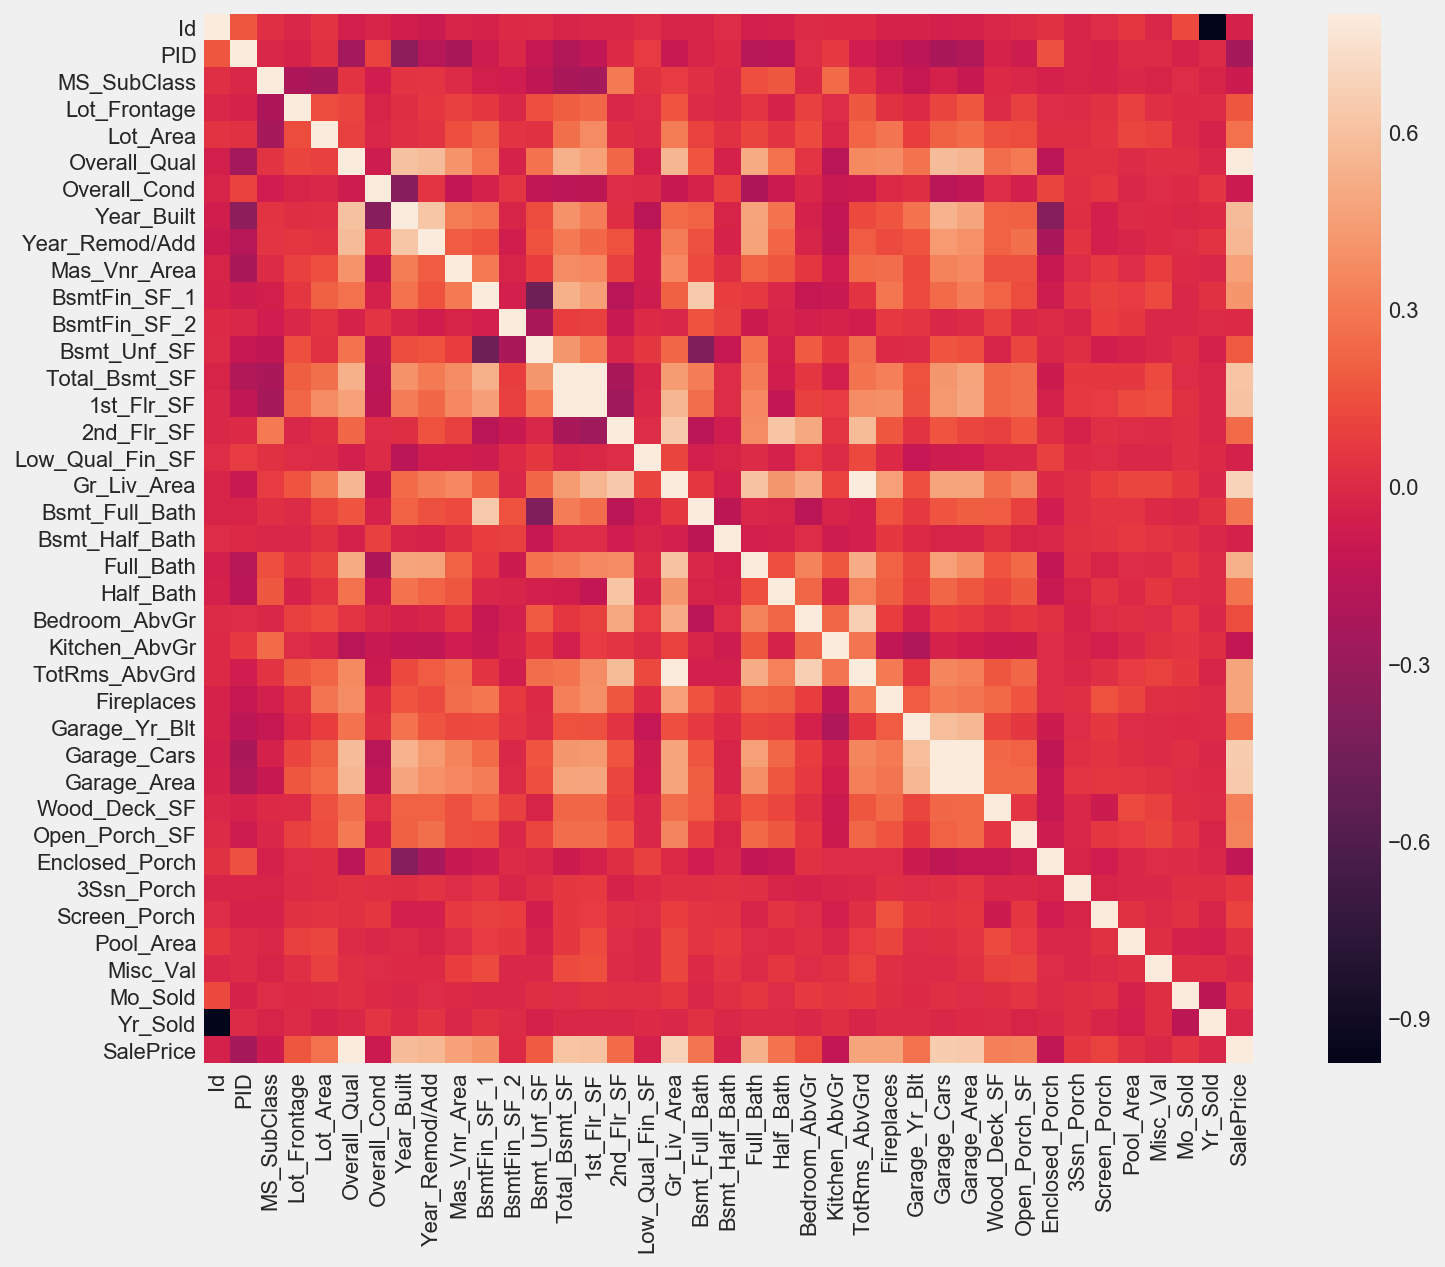

In [42]:
corr_all = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_all, vmax=.8, square=True);


In [23]:
print(train['SalePrice'].describe())


count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64


In [43]:
corr = train.corr()
corr

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
Id,1.000000,0.175202,0.024520,-0.011988,0.038810,-0.059480,-0.027161,-0.062507,-0.088226,-0.032160,-0.036676,-0.002622,0.006471,-0.032223,-0.017019,-0.011526,0.011568,-0.022220,-0.031104,0.013994,-0.058652,-0.042591,0.005732,-0.002786,-0.004408,-0.034580,-0.038401,-0.047229,-0.042456,-0.012608,0.004201,0.033205,-0.023074,0.013831,0.055807,-0.012901,0.124524,-0.975802,-0.045862
PID,0.175202,1.000000,-0.005958,-0.034542,0.035327,-0.257532,0.104286,-0.342836,-0.171742,-0.233108,-0.079395,-0.009531,-0.109707,-0.195200,-0.135331,-0.001203,0.071850,-0.101054,-0.027050,-0.003668,-0.172594,-0.159739,0.011509,0.067431,-0.073311,-0.115573,-0.151961,-0.222219,-0.193240,-0.036602,-0.078297,0.148478,-0.025348,-0.035087,0.005472,0.003712,-0.034607,0.008788,-0.245078
MS_SubClass,0.024520,-0.005958,1.000000,-0.215582,-0.247154,0.042071,-0.071465,0.038927,0.047687,0.005442,-0.053924,-0.069076,-0.140211,-0.221425,-0.243394,0.306707,0.030874,0.073457,0.029471,-0.017642,0.145092,0.181603,-0.005956,0.251942,0.038544,-0.051924,-0.110296,-0.046084,-0.104361,0.000764,-0.018464,-0.040786,-0.030363,-0.036878,-0.004739,-0.027727,0.011970,-0.031546,-0.082084
Lot_Frontage,-0.011988,-0.034542,-0.215582,1.000000,0.137157,0.106772,-0.030462,0.016222,0.055183,0.094289,0.051824,-0.006882,0.147268,0.198454,0.225327,-0.017965,0.011967,0.164797,0.007567,-0.017901,0.049139,-0.034901,0.097582,0.015970,0.178090,0.034236,0.001341,0.112830,0.169233,0.006710,0.091882,0.010799,0.008524,0.031965,0.092816,0.026513,-0.002706,0.007152,0.173443
Lot_Area,0.038810,0.035327,-0.247154,0.137157,1.000000,0.088534,-0.014179,0.025212,0.041357,0.142208,0.206539,0.040764,0.035935,0.263566,0.373296,0.019372,0.002456,0.313434,0.106156,0.032508,0.111946,0.039745,0.133014,-0.011598,0.224025,0.284513,0.084824,0.204060,0.249119,0.148532,0.139023,0.018496,0.021088,0.039646,0.118348,0.096979,0.004342,-0.032666,0.270928
Overall_Qual,-0.059480,-0.257532,0.042071,0.106772,0.088534,1.000000,-0.077273,0.599701,0.581864,0.408879,0.266292,-0.038174,0.274949,0.535708,0.461336,0.224962,-0.051716,0.554412,0.168611,-0.044360,0.508420,0.268117,0.049981,-0.170949,0.365366,0.382898,0.277199,0.579588,0.553636,0.253654,0.307161,-0.151987,0.033836,0.034810,0.007520,0.023667,0.023264,-0.011256,0.804411
Overall_Cond,-0.027161,0.104286,-0.071465,-0.030462,-0.014179,-0.077273,1.000000,-0.369303,0.045881,-0.127036,-0.042380,0.050648,-0.130562,-0.155919,-0.146738,0.013329,0.004433,-0.104646,-0.037998,0.099257,-0.216784,-0.090946,-0.008803,-0.096424,-0.088436,-0.003387,0.016927,-0.165315,-0.134091,0.013919,-0.050761,0.107316,0.026621,0.052219,-0.006001,0.014010,-0.004033,0.048035,-0.089034
Year_Built,-0.062507,-0.342836,0.038927,0.016222,0.025212,0.599701,-0.369303,1.000000,0.626565,0.312306,0.270350,-0.024412,0.134564,0.404196,0.314803,0.018274,-0.159291,0.249185,0.212407,-0.029766,0.476667,0.279531,-0.044755,-0.126306,0.125767,0.163244,0.274084,0.538897,0.483310,0.215508,0.205581,-0.379174,0.016839,-0.046926,0.004159,0.001219,-0.005175,-0.004244,0.582758
Year_Remod/Add,-0.088226,-0.171742,0.047687,0.055183,0.041357,0.581864,0.045881,0.626565,1.000000,0.192958,0.160248,-0.060214,0.158628,0.301858,0.234911,0.158101,-0.066139,0.315588,0.150411,-0.036361,0.468614,0.220383,-0.021697,-0.135140,0.192955,0.133360,0.163151,0.435362,0.392179,0.216428,0.262768,-0.236099,0.041173,-0.049471,-0.022069,-0.001163,0.013511,0.042250,0.561820
Mas_Vnr_Area,-0.032160,-0.233108,0.005442,0.094289,0.142208,0.408879,-0.127036,0.312306,0.192958,1.000000,0.300946,-0.027716,0.082094,0.3818

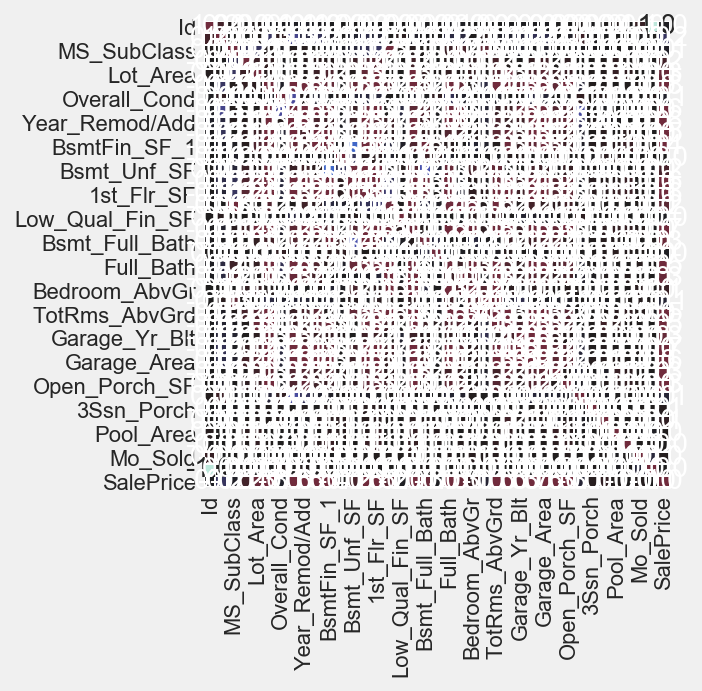

In [44]:
sns.heatmap(corr,  vmax=.3, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cbar=False)

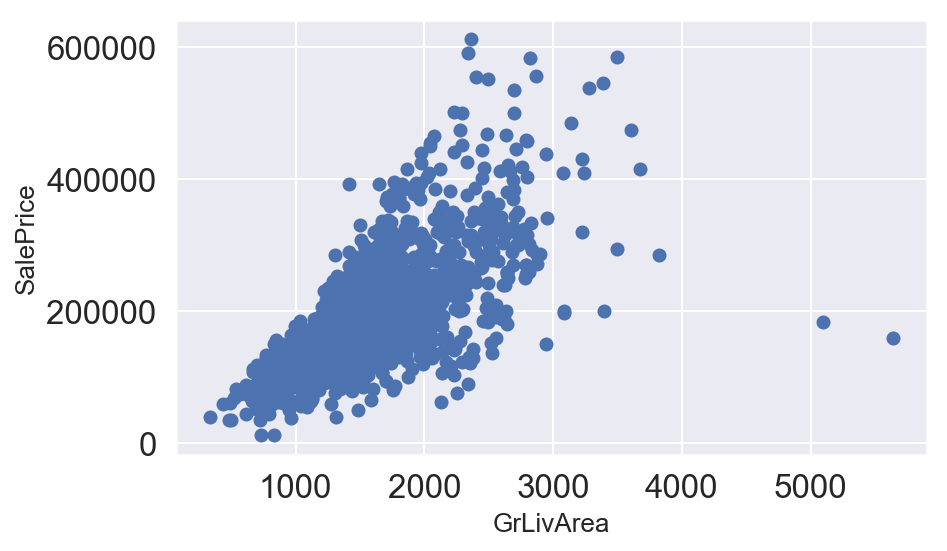

In [108]:
fig, ax = plt.subplots()
ax.scatter(x = train['Gr_Liv_Area'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


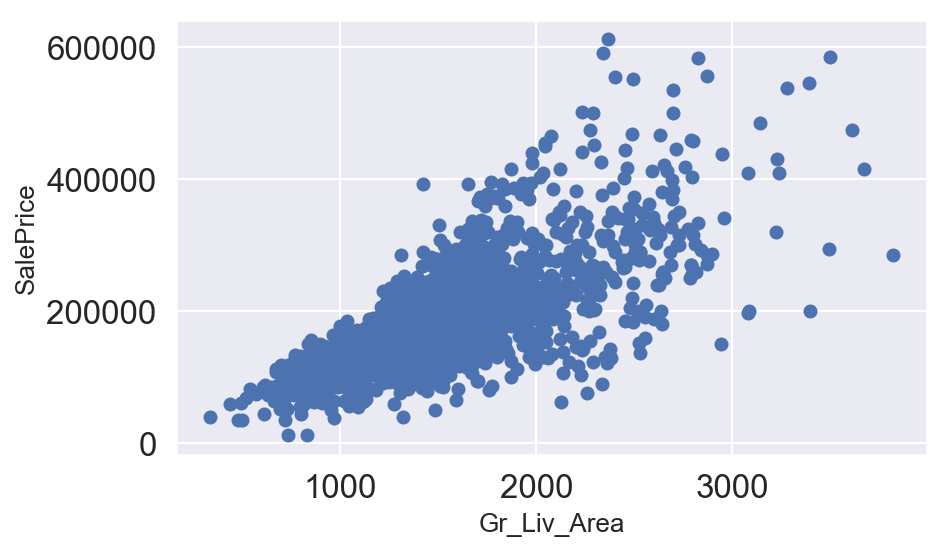

In [112]:
train = train.drop(train[(train['Gr_Liv_Area']>4000) & (train['SalePrice']<200000)].index)
fig, ax = plt.subplots()
ax.scatter(train['Gr_Liv_Area'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr_Liv_Area', fontsize=13)
plt.show()


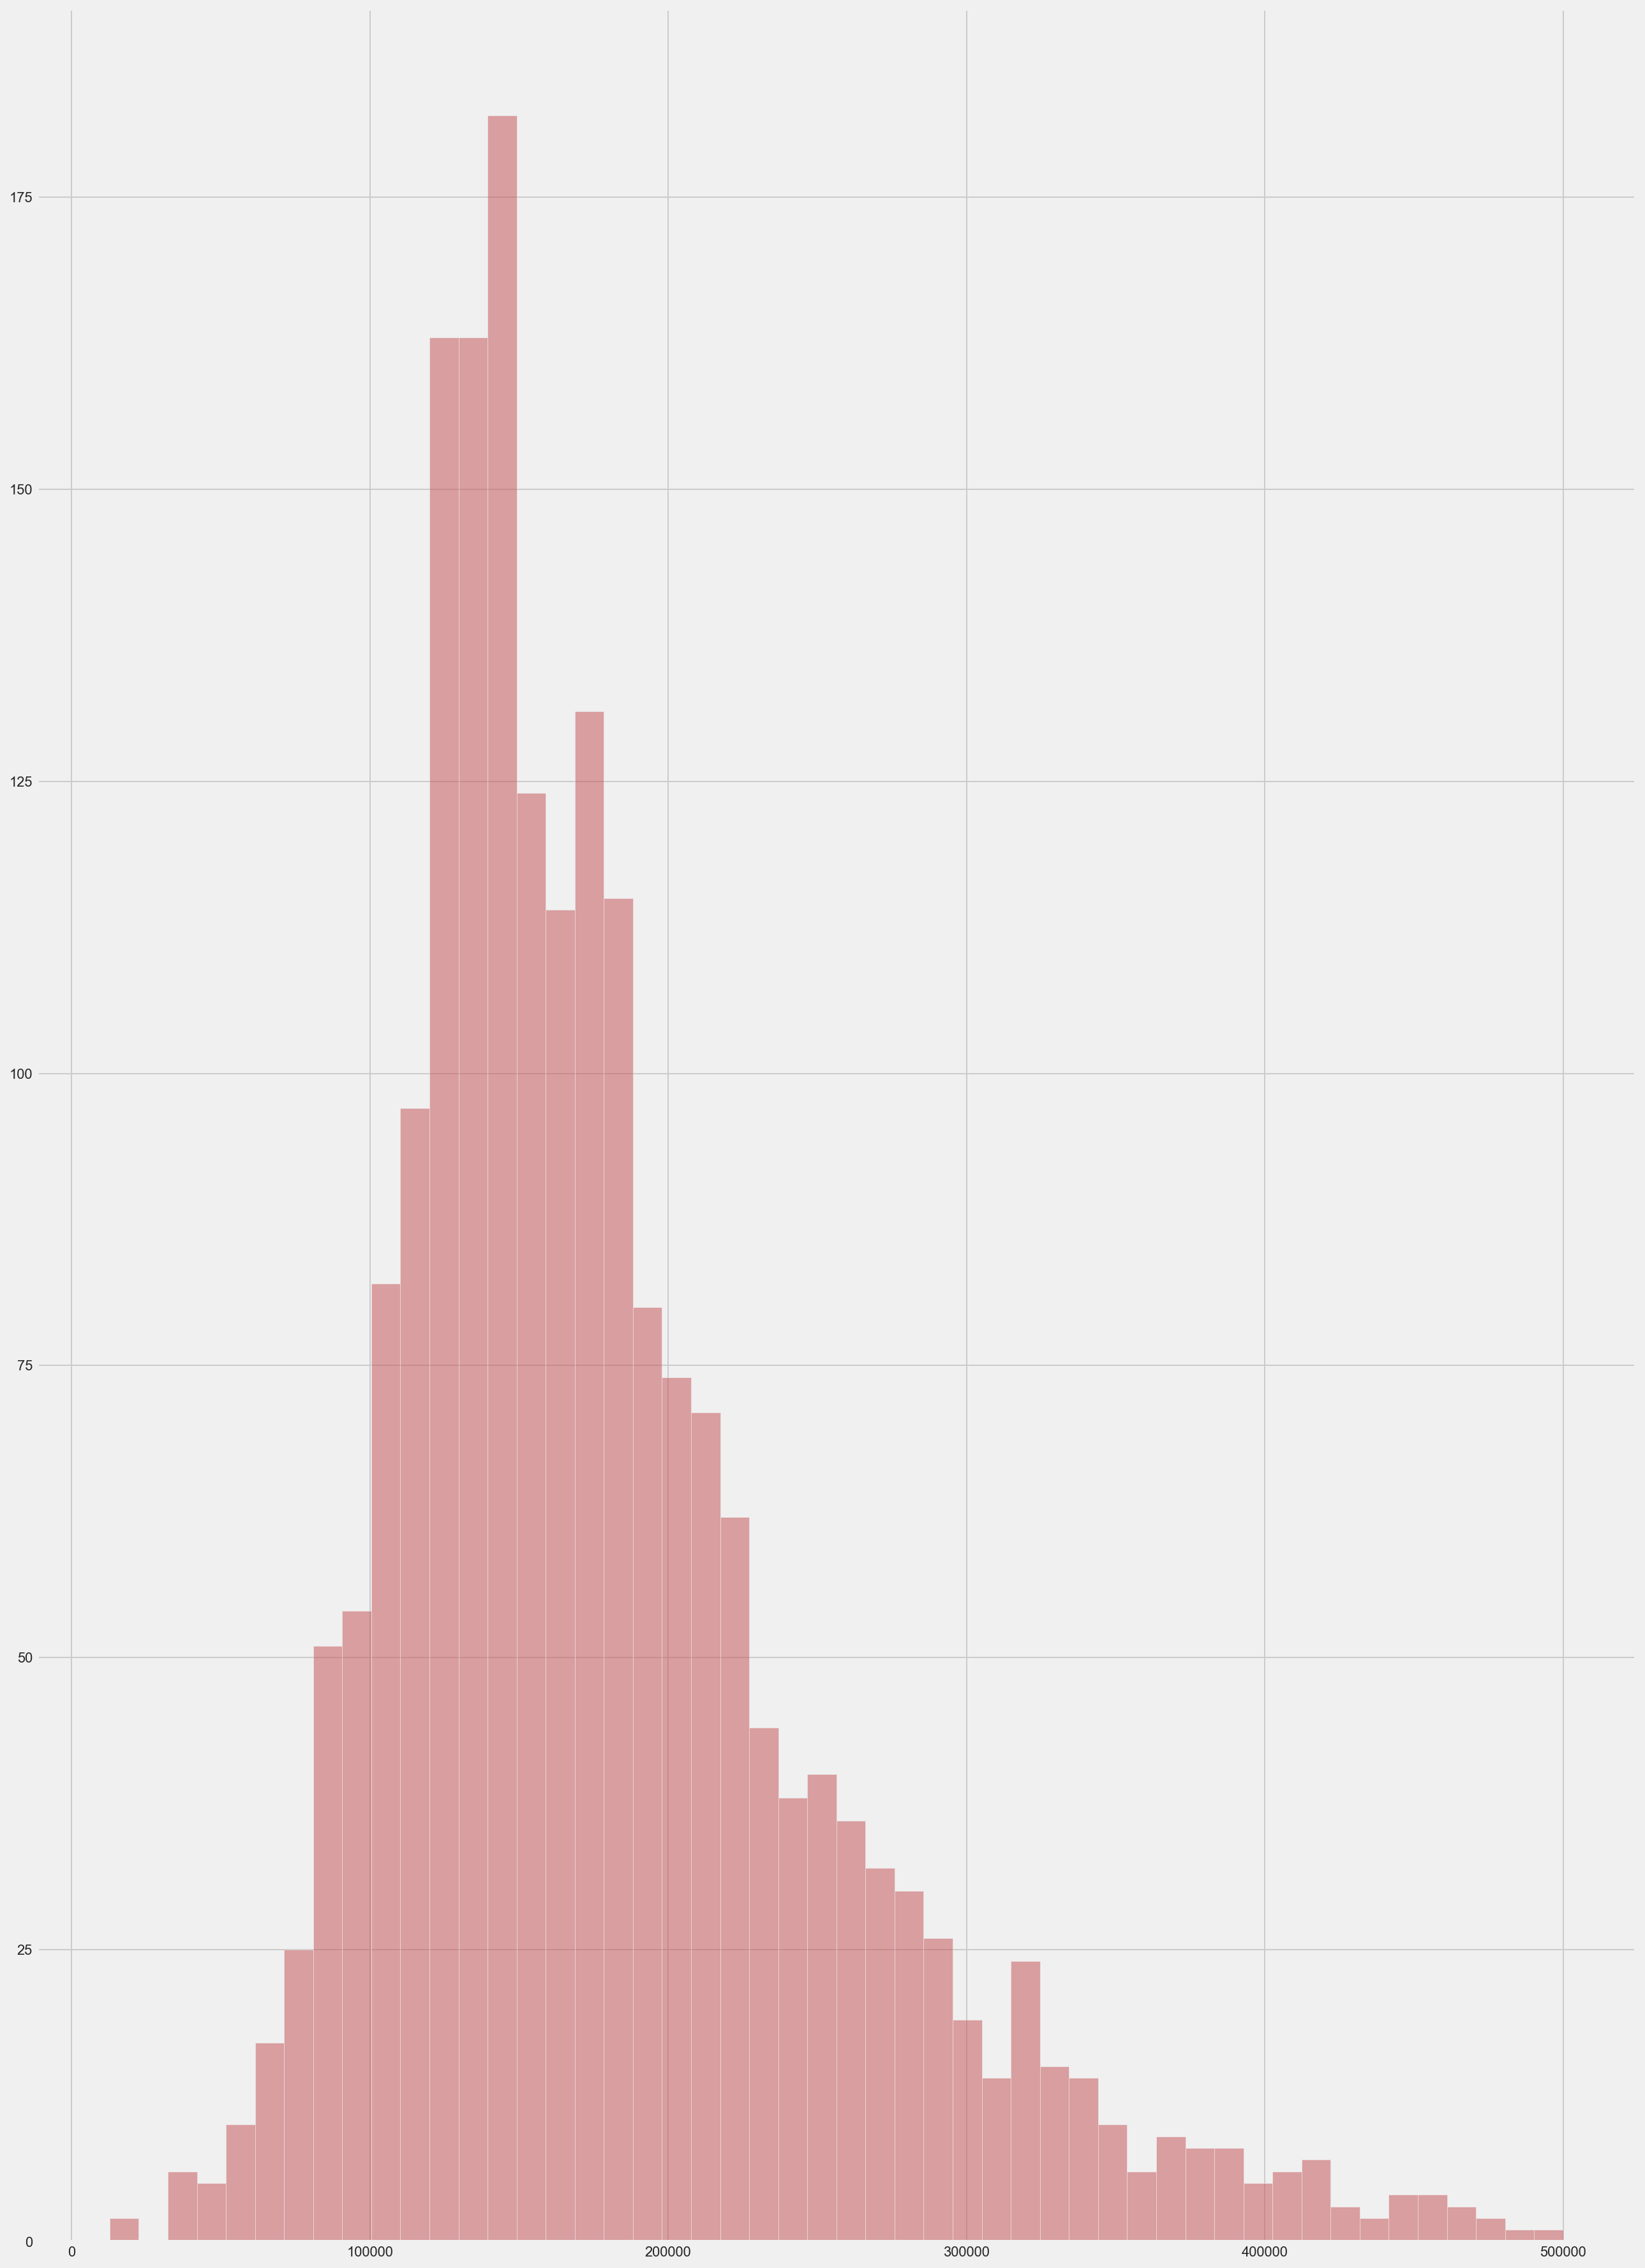

In [45]:
train.SalePrice.hist( color="r", alpha=0.5, bins=50,figsize=(20,30));

In [46]:
train_without_outliers = train[(train.SalePrice-train.SalePrice.mean()) < (2*train.SalePrice.std())]


In [47]:
train_without_outliers.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


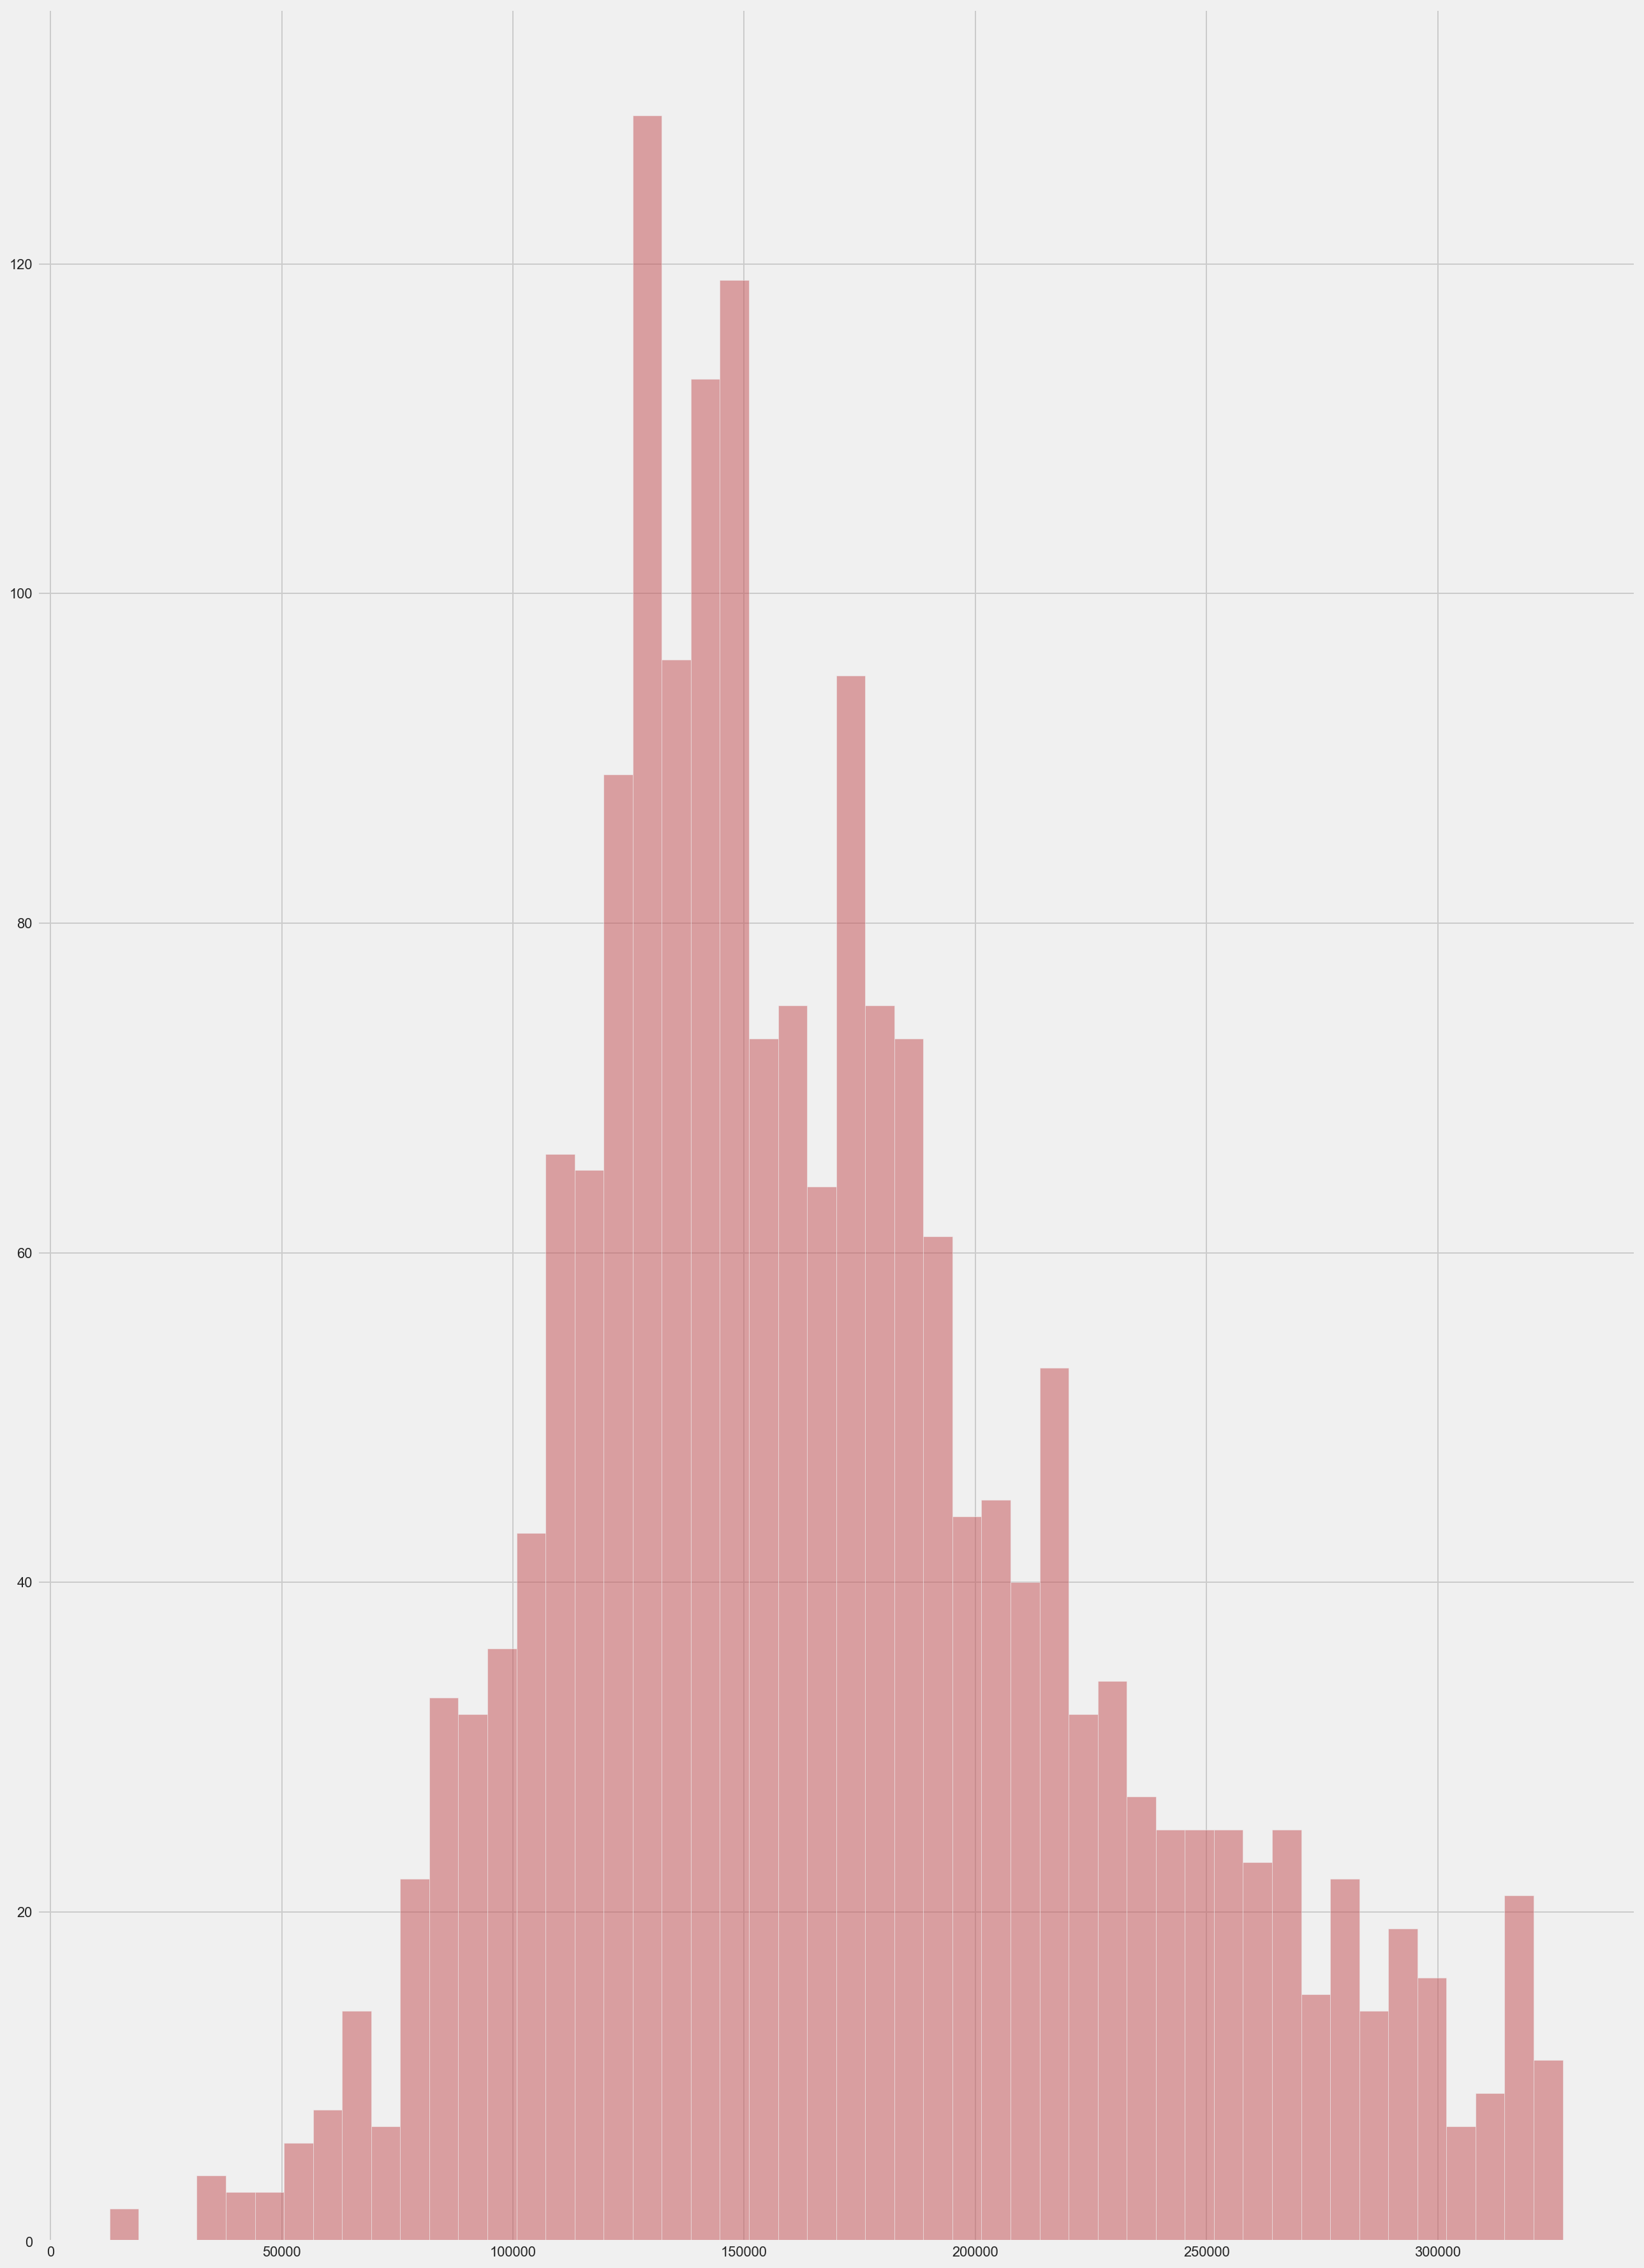

In [48]:
train_without_outliers.SalePrice.hist( color="r", alpha=0.5, bins=50,figsize=(20,30));

In [30]:
train.shape

(2051, 82)

In [31]:
mask = (train.SalePrice > 500000)
index_data = train[mask]
train.drop(index_data.index, inplace=True,  axis=0)

In [49]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)


In [71]:
print(train_dummies.shape)
print(test_dummies.shape)

(2039, 313)
(879, 289)


In [50]:
corr_ = pd.DataFrame(np.abs(train_dummies.corr()['SalePrice']).sort_values(ascending=False)[1:10])
corr_ 
 


,SalePrice
Overall_Qual,0.804411
Gr_Liv_Area,0.688626
Garage_Cars,0.652437
Garage_Area,0.646766
Total_Bsmt_SF,0.616273
Exter_Qual_TA,0.609955
1st_Flr_SF,0.606044
Year_Built,0.582758
Year_Remod/Add,0.561820


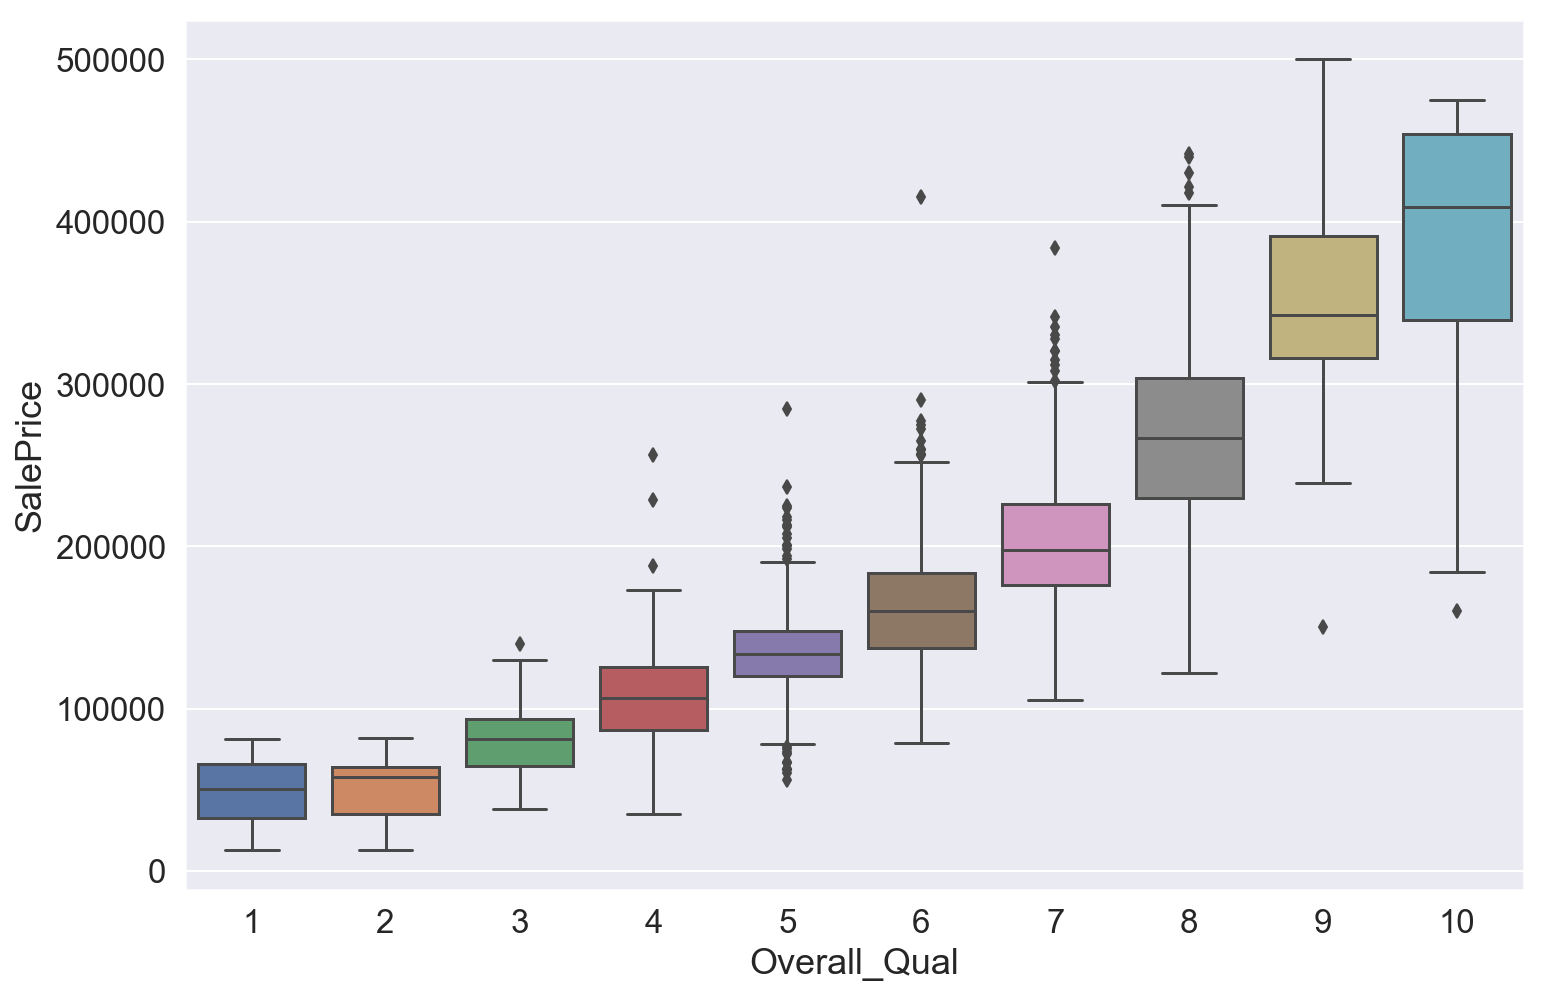

In [34]:
data = pd.concat([train['SalePrice'], train['Overall_Qual']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='Overall_Qual', y="SalePrice", data=data)

In [35]:
# sns.set(style="whitegrid")
# corr = train.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# plt.figure(figsize=(35,20))
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.1f',
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, cbar=False)

In [86]:
sns.set(style="whitegrid")

sale_corr =train.loc[:, ['Overall_Qual','Gr_Liv_Area','Garage_Cars','Total_Bsmt_SF','Garage_Area',
              '1st_Flr_SF','Year_Built']]
plt.figure(figsize=(10,10))
sns.heatmap(train[sale_corr].corr(),annot=True,fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 
plt.show()


ValueError: Must pass DataFrame with boolean values only

<Figure size 720x720 with 0 Axes>

/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


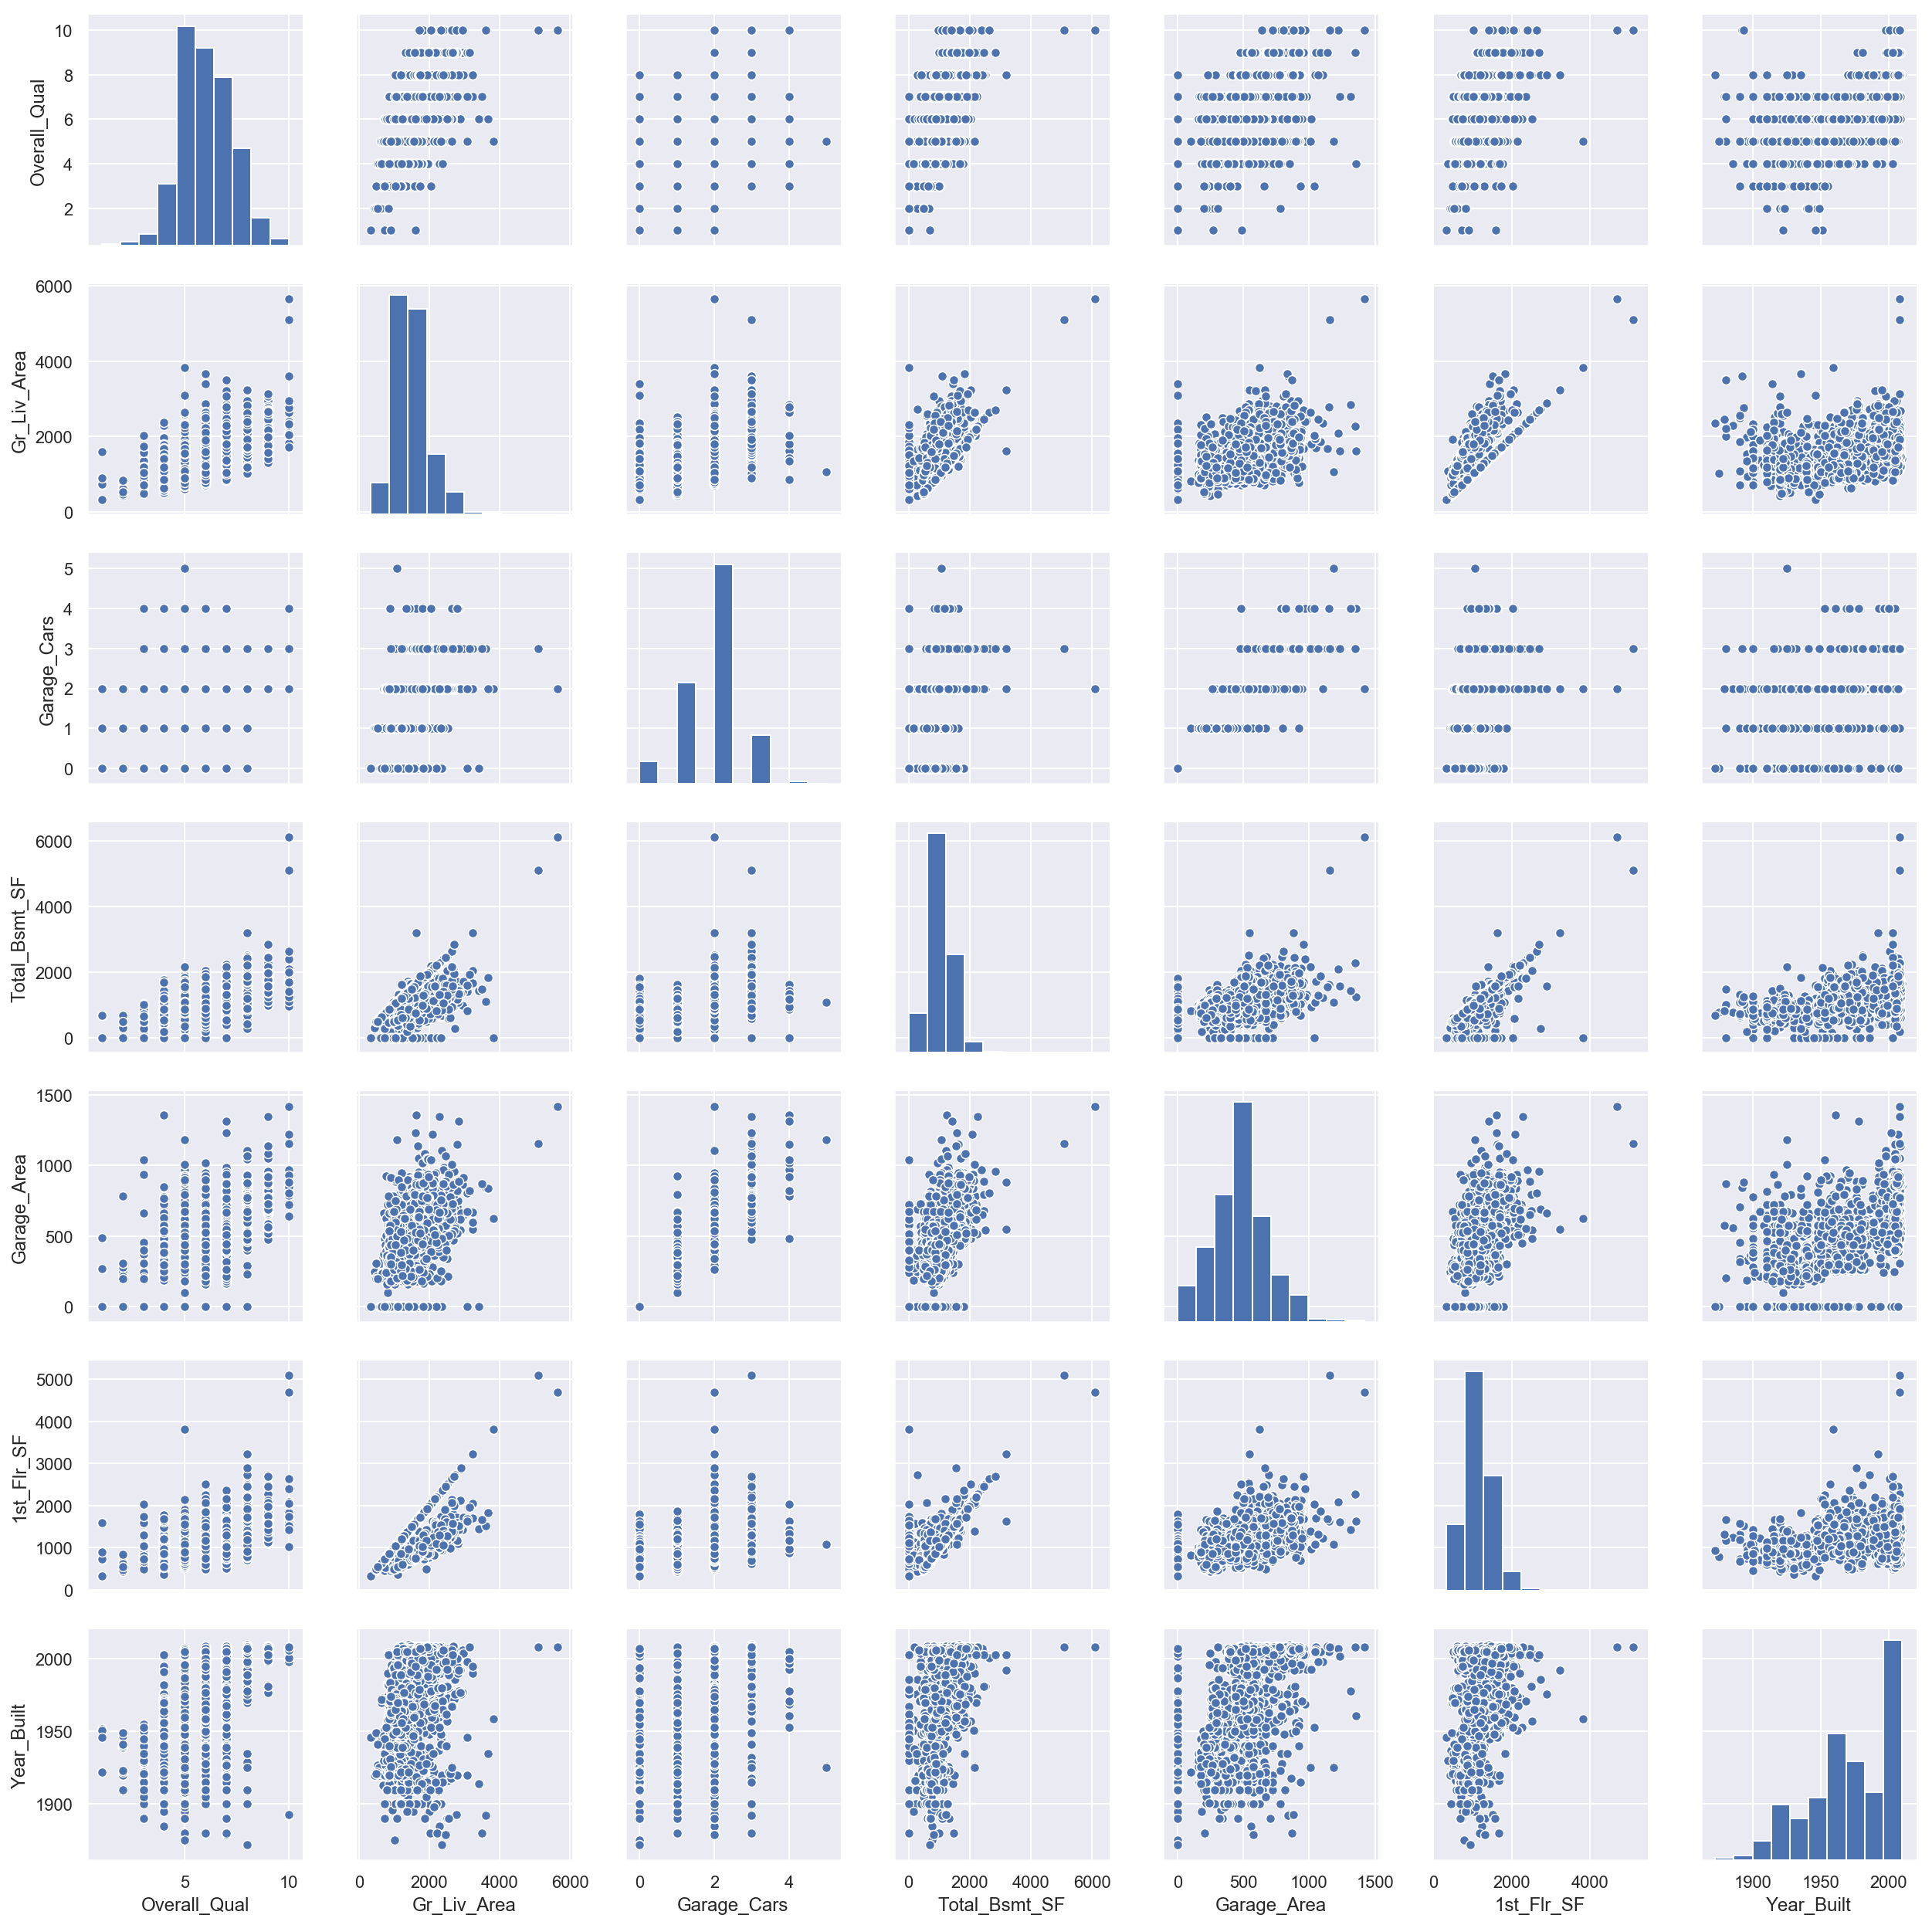

In [87]:
sns.set()
corr_train =['Overall_Qual','Gr_Liv_Area','Garage_Cars','Total_Bsmt_SF','Garage_Area',
              '1st_Flr_SF','Year_Built']
sns.pairplot(train[corr_train], size = 2.5)
plt.show();

In [88]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [89]:
X =train_dummies
X=X.drop('SalePrice',axis=1)
X_test=test
y = train.SalePrice

In [90]:
X1 =sale_corr
# X=X.drop('SalePrice',axis=1)
X_test=test
y1 = train.SalePrice

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1)

In [94]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.5, random_state=1)

In [66]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1019, 312) (1019,)
(1020, 312) (1020,)


In [67]:
model = Ridge(alpha=21)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.87253549 0.66861703 0.87746099 0.23930157 0.9205044 ]
Mean cross-validated training score: 0.7156838965064578
Training Score: 0.9107729832235033
Test Score: 0.8901004999728838


/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.041058e-19
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.078742e-19
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.012265e-19
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal conditi

In [96]:
model1 = Ridge(alpha=21)

# get cross validated scores
scores = cross_val_score(model1, X1_train, y1_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model1.fit(X1_train, y1_train)
print("Training Score:", model1.score(X1_train, y1_train))
# evaluate the data on the test set
print("Test Score:", model1.score(X1_test, y1_test))

Cross-validated training scores: [0.78493732 0.82022865 0.77839236 0.37245241 0.83155052]
Mean cross-validated training score: 0.7175122497698302
Training Score: 0.767807952405334
Test Score: 0.8161459661038306


In [97]:
 ###create a Lasso model instance
model = Lasso(alpha=0.35)
set.seed(27042018)
# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())
# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

AttributeError: type object 'set' has no attribute 'seed'

In [72]:
 ##create a RidgeCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5);
# fit the model
model.fit(X_train, y_train);
# get the best alpha
print('Best alpha:', model.alpha_);
# evaluate on the training set
print('Training score:', model.score(X_train, y_train));
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test));

/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.929254e-24
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.163240e-24
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.815488e-24
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal conditi

Best alpha: 2.782559402207126
Training score: 0.9322334914303307
Test Score: 0.8878904005777348


/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.975061e-17
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.985636e-17
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.964829e-17
  overwrite_a=True).T
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal conditi

In [70]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)
# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

Best alpha: 21.54434690031882
Training score: 0.9516702102405097
Test Score: 0.9042571638803151


/Users/nawalhasan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
